<a href="https://colab.research.google.com/github/silasautomata/projeto-pratico-Case-educa-o/blob/main/Projeto_Pr%C3%A1tico_Case_Educa%C3%A7%C3%A3o_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lendo a Base de Dados
base_dados = pd.read_csv('/content/StudentsPerformance (2).csv')

# dimensão
base_dados.shape

(1000, 8)

In [ ]:
base_dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


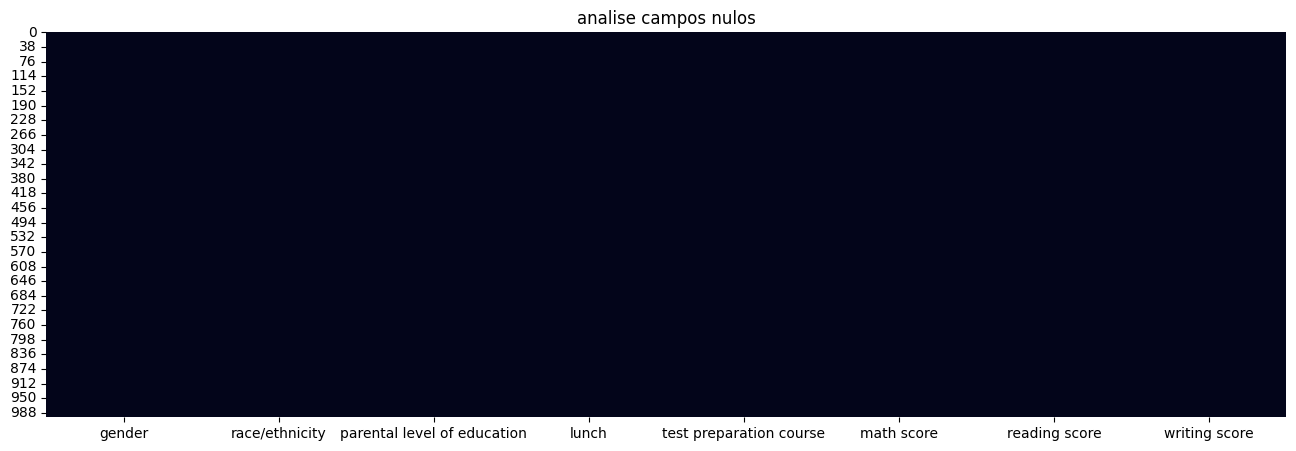

In [ ]:
nulos = base_dados.isnull() # verifica valores nulos NAN
plt.figure(figsize=(16,5)) #tamanho da figura
plt.title('analise campos nulos') # titulo
sns.heatmap(nulos,cbar=False); # gera o grarfico pegando os valores nulos

In [ ]:
base_dados.nunique() # verifica os campos unicos

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
# campos duplicados
base_dados.duplicated().sum()

np.int64(0)

In [ ]:
base_dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# pega os generos da coluna-contando quantas veses o genero aparece e multiplica por 100 para gera a porcentagem
base_dados['gender'].value_counts(normalize=True)* 100

,proportion
gender,
female,51.8
male,48.2


In [ ]:
# faz a mesma coisa que o exemplo acima
base_dados['race/ethnicity'].value_counts(normalize=True)* 100

,proportion
race/ethnicity,
group C,31.9
group D,26.2
group B,19.0
group E,14.0
group A,8.9


In [ ]:
# faz a mesma coisa que o exemplo acima
base_dados['parental level of education'].value_counts(normalize=True)* 100

,proportion
parental level of education,
some college,22.6
associate's degree,22.2
high school,19.6
some high school,17.9
bachelor's degree,11.8
master's degree,5.9


In [ ]:
# faz a mesma coisa que o exemplo acima
base_dados['lunch'].value_counts(normalize=True) * 100

,proportion
lunch,
standard,64.5
free/reduced,35.5


In [ ]:
base_dados['test preparation course'].value_counts(normalize=True) * 100

,proportion
test preparation course,
none,64.2
completed,35.8


<Axes: xlabel='math score', ylabel='gender'>

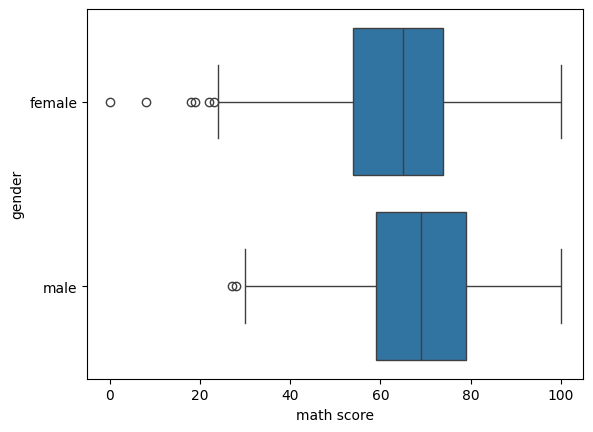

In [ ]:
# em matematica as notas dos homens estao bem melhor que as mulheres
sns.boxplot(data=base_dados,x='math score', y='gender')

<Axes: xlabel='reading score', ylabel='gender'>

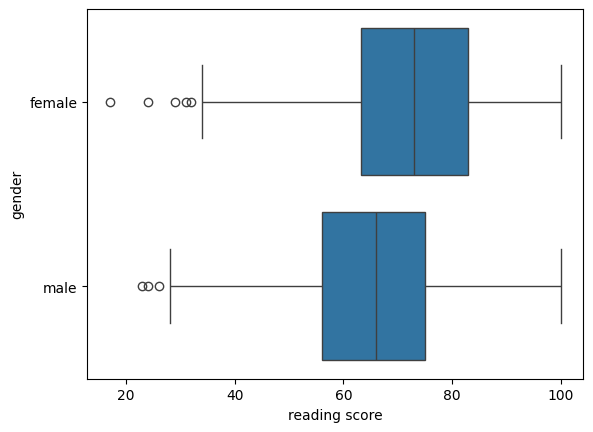

In [ ]:
# as mulheres estao melhores que os homens em leitura
sns.boxplot(data=base_dados,x='reading score', y ='gender')

<Axes: xlabel='writing score', ylabel='gender'>

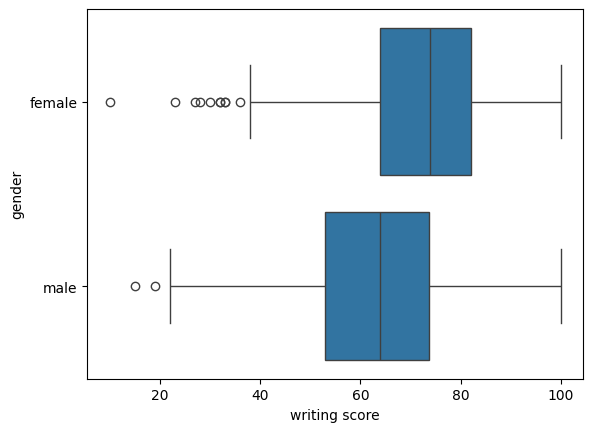

In [ ]:
# mulheres tem as melhores notas em redaçao
sns.boxplot(data=base_dados,x='writing score',y='gender')

In [ ]:
# agrupa as colunas de genero criando uma descriçao estatistica entre as notas de matematica e resetando o index
base_dados.groupby(by=['gender']).describe()['math score'].reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


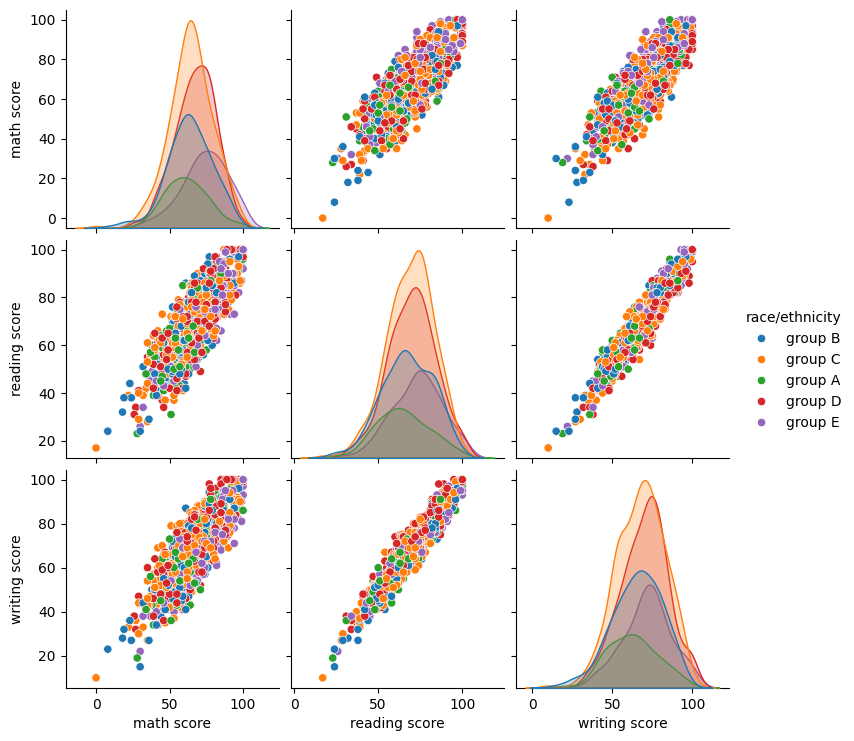

In [ ]:
# gera um ghrid com os dados numericos da coluna de 'race' que possuem os grupos A,B,C,D,E
#obs: esse grafico nao e recomendado para dados muitos grandes, caso contrario sua maquina possa nao aguentar
sns.pairplot(base_dados, hue ='race/ethnicity')

<Axes: xlabel='math score', ylabel='race/ethnicity'>

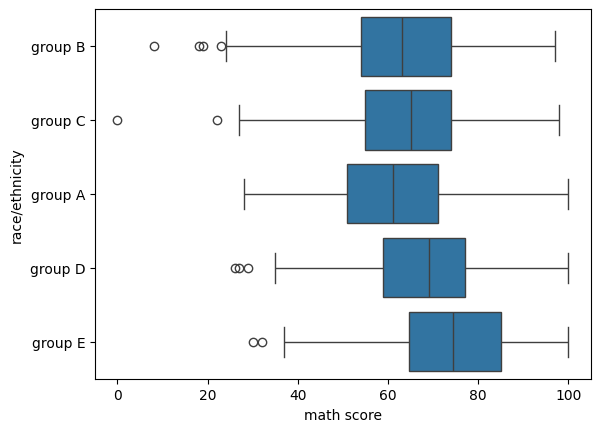

In [ ]:
# gera o grafico de 'matematica' entra os 'grupos A,B,C,D,E'
sns.boxplot(data=base_dados,x='math score', y='race/ethnicity')

<Axes: xlabel='math score', ylabel='parental level of education'>

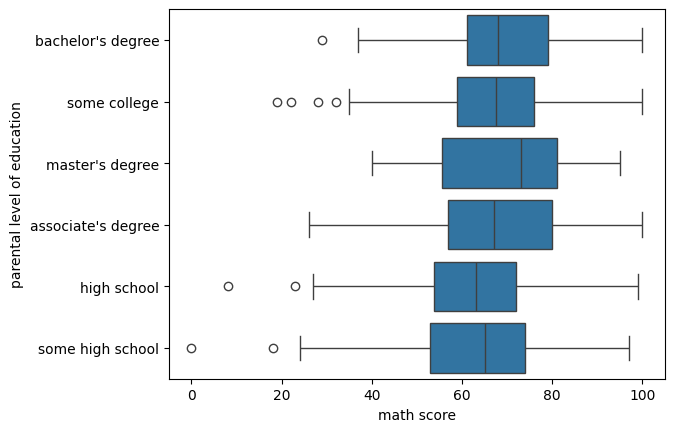

In [ ]:
# gerar o grafico de 'matemetica' entra o 'niveis de educaçao dos pais '
sns.boxplot(data=base_dados,x='math score', y='parental level of education')

In [ ]:
# agrupa a coluna de 'educaçao dos pais gerando uma descriçao estatistica nas notas de matematica, resetando o index
base_dados.groupby(by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


<Axes: xlabel='math score', ylabel='test preparation course'>

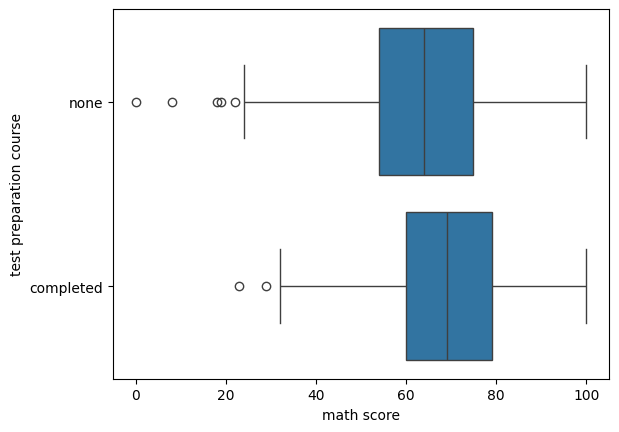

In [ ]:
# gera um grafico das notas de matematica entre aqueles que se prepararam ou nao
sns.boxplot(data=base_dados, x='math score', y='test preparation course')

In [ ]:
# agrupa a coluna de quem se preparou para o teste gerando uma estatistica com as notas de matematica e resetando o index
base_dados.groupby(by=['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


<Axes: xlabel='math score', ylabel='writing score'>

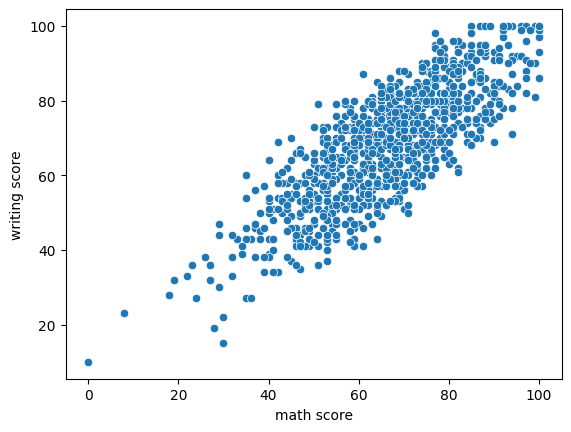

In [ ]:
# grafico para as notas de matematica e escrita
sns.scatterplot(data=base_dados, x='math score', y='writing score')



resumo da analise feita por IA (Gemini)

1. Importação e Limpeza dos Dados:

Você importou bibliotecas importantes como Pandas, NumPy, Seaborn e Matplotlib.
Carregou a base de dados "StudentsPerformance.csv" usando Pandas.
Verificou e confirmou a ausência de valores nulos na base de dados usando um mapa de calor do Seaborn.
Identificou a quantidade de valores únicos em cada coluna e verificou se havia dados duplicados.
2. Análise Descritiva:

Obteve estatísticas descritivas da base de dados, como média, desvio padrão, mínimo, máximo e quartis, usando o método describe().
Usou o método info() para visualizar os tipos de dados de cada coluna e a quantidade de valores não nulos.
3. Análise de Gênero:

Calculou a distribuição percentual de gênero na base de dados.
Utilizou boxplots do Seaborn para comparar as notas de matemática, leitura e escrita entre gêneros.
Agrupou os dados por gênero e obteve estatísticas descritivas da nota de matemática para cada grupo.
4. Análise de Raça/Etnia:

Calculou a distribuição percentual de raça/etnia na base de dados.
Criou um pairplot do Seaborn para visualizar a relação entre as notas de matemática, leitura e escrita, com base na raça/etnia.
Usou boxplots para comparar as notas de matemática entre diferentes grupos raciais/étnicos.
5. Análise do Nível de Educação dos Pais:

Calculou a distribuição percentual do nível de educação dos pais na base de dados.
Utilizou boxplots para comparar as notas de matemática com base no nível de educação dos pais.
Agrupou os dados pelo nível de educação dos pais e obteve estatísticas descritivas da nota de matemática para cada grupo.
6. Análise do Curso de Preparação para o Teste:

Calculou a distribuição percentual dos alunos que fizeram ou não o curso de preparação para o teste.
Usou boxplots para comparar as notas de matemática entre os grupos que fizeram e não fizeram o curso de preparação.
Agrupou os dados pela participação no curso de preparação e obteve estatísticas descritivas da nota de matemática para cada grupo.
7. Correlação entre Notas:

Utilizou um scatterplot do Seaborn para visualizar a correlação entre as notas de matemática e escrita.
Conclusões:

